<a href="https://colab.research.google.com/github/LokeshMeshram32/covid19-data-visualization/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_covid = pd.read_csv('covid_19_data.csv')
df_covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [92]:
# Check for missing values in df_covid
print(df_covid.isnull().sum())

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [93]:
# Handle missing 'Province/State' values by filling with a placeholder
df_covid['Province/State'] = df_covid['Province/State'].fillna('Unknown Province/State')

# Verify that missing values have been handled in df_covid
print("\nMissing values after handling in df_covid:")
print(df_covid.isnull().sum())


Missing values after handling in df_covid:
SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


In [94]:
# Convert 'ObservationDate' to datetime objects
df_covid['ObservationDate'] = pd.to_datetime(df_covid['ObservationDate'])

# Basic statistical analysis on numerical columns
print("\nBasic statistical analysis for df_covid:")
df_covid.describe()


Basic statistical analysis for df_covid:


,SNo,ObservationDate,Confirmed,Deaths,Recovered
count,306429.000000,306429,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,2020-11-06 01:54:54.146441728,8.567091e+04,2036.403268,5.042029e+04
min,1.000000,2020-01-22 00:00:00,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,2020-07-30 00:00:00,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,2020-11-10 00:00:00,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,2021-02-18 00:00:00,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,2021-05-29 00:00:00,5.863138e+06,112385.000000,6.399531e+06
std,88458.577156,NaN,2.775516e+05,6410.938048,2.015124e+05


In [95]:
# Group by date and country to get total cases, deaths, and recoveries over time
df_time = df_covid.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

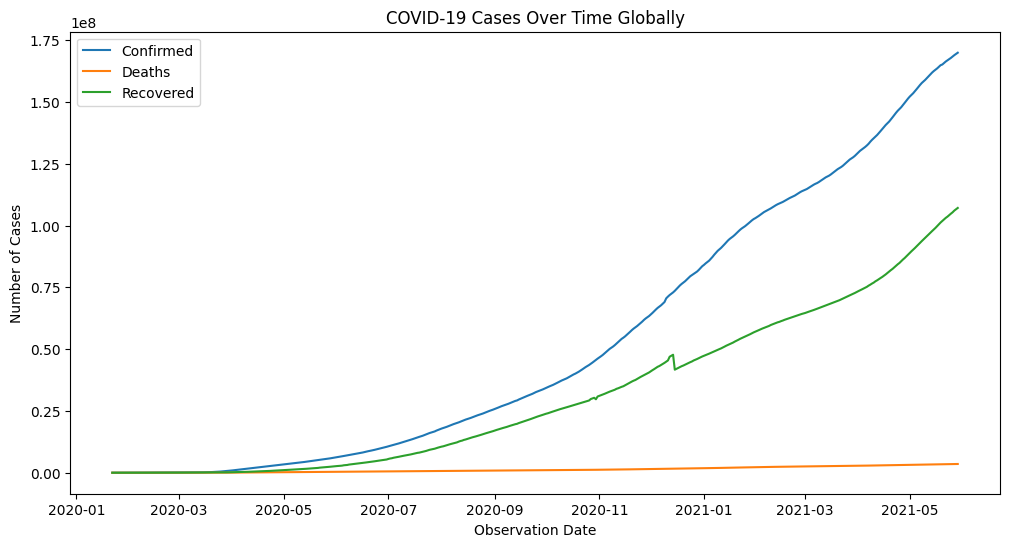

In [96]:
# Visualize the trend of Confirmed, Deaths, and Recovered cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=df_time, x='ObservationDate', y='Recovered', label='Recovered')
plt.title('COVID-19 Cases Over Time Globally')
plt.xlabel('Observation Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

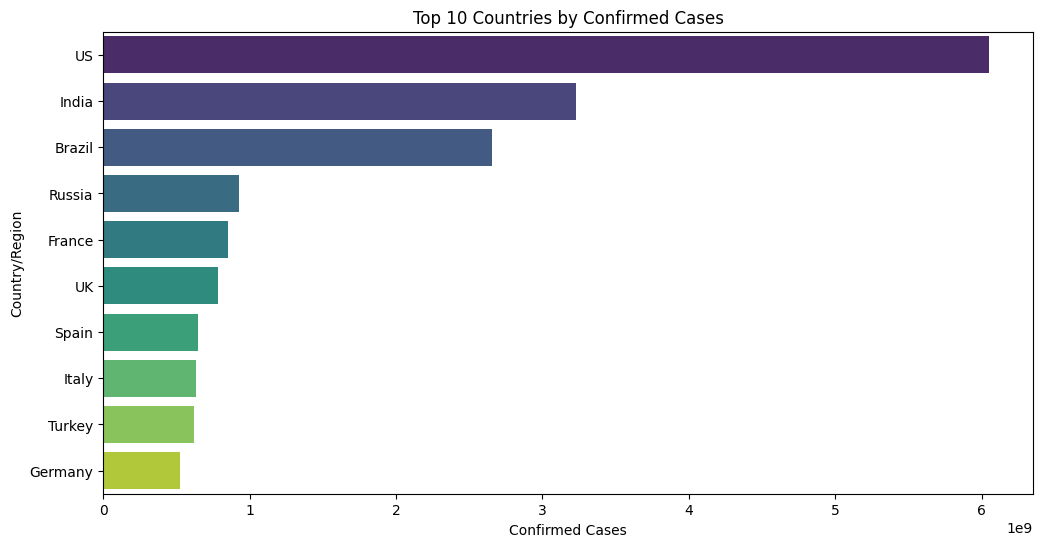

In [97]:
# Get the latest data for each country
df_latest = df_covid.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Sort by confirmed cases and visualize top 10 countries
df_latest_top10_confirmed = df_latest.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=df_latest_top10_confirmed,hue='Country/Region', palette='viridis', legend=False)
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.show()

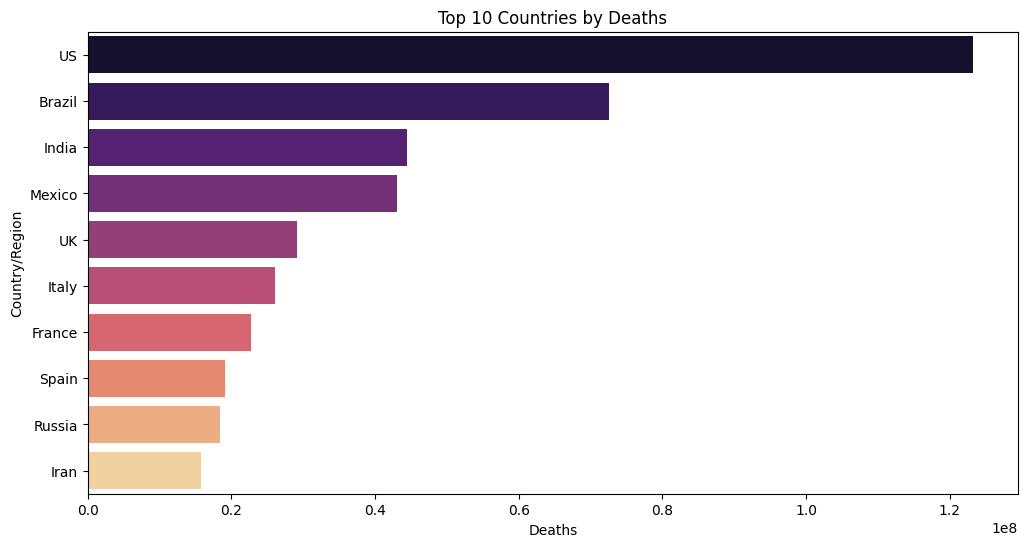

In [98]:
# Visualize top 10 countries by deaths
df_latest_top10_deaths = df_latest.sort_values(by='Deaths', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Deaths', y='Country/Region', data=df_latest_top10_deaths, hue='Country/Region', palette='magma', legend=False)
plt.title('Top 10 Countries by Deaths')
plt.xlabel('Deaths')
plt.ylabel('Country/Region')
plt.show()

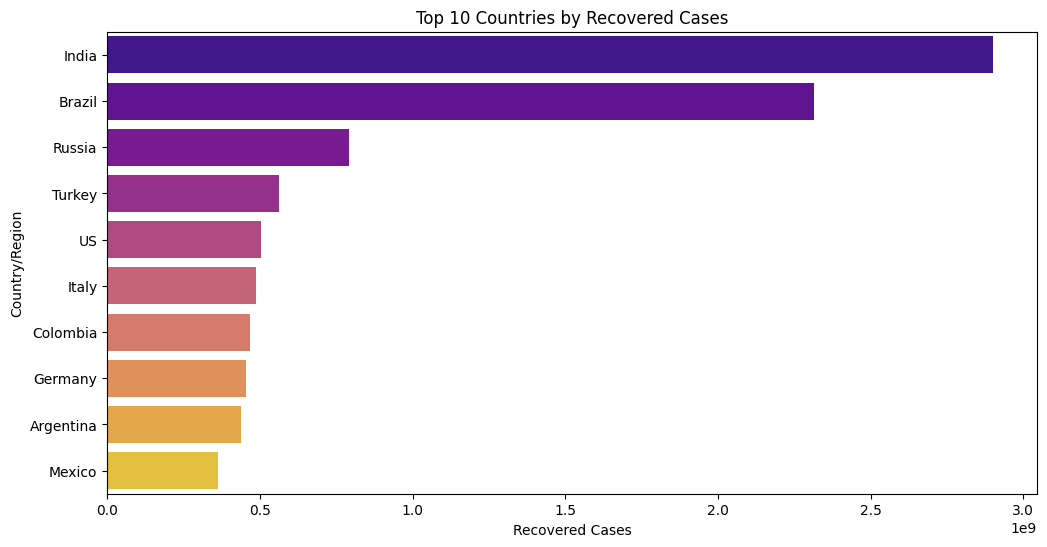

In [99]:
# Visualize top 10 countries by recovered cases
df_latest_top10_recovered = df_latest.sort_values(by='Recovered', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Recovered', y='Country/Region', data=df_latest_top10_recovered, hue='Country/Region', palette='plasma', legend=False)
plt.title('Top 10 Countries by Recovered Cases')
plt.xlabel('Recovered Cases')
plt.ylabel('Country/Region')
plt.show()

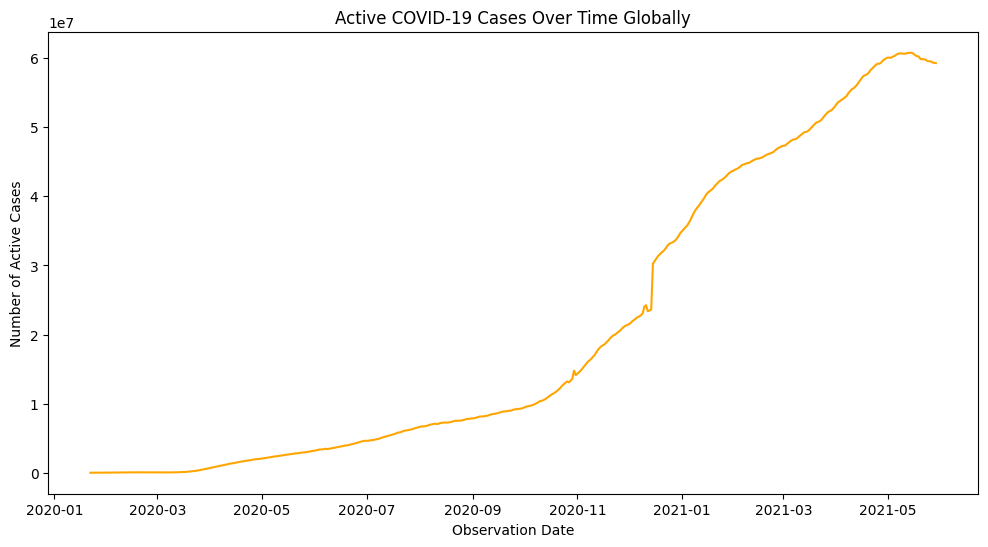

In [100]:
# Calculate Active cases
df_covid['Active'] = df_covid['Confirmed'] - df_covid['Deaths'] - df_covid['Recovered']

# Group by date to see active cases over time
df_time_active = df_covid.groupby('ObservationDate')['Active'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time_active, x='ObservationDate', y='Active', color='orange')
plt.title('Active COVID-19 Cases Over Time Globally')
plt.xlabel('Observation Date')
plt.ylabel('Number of Active Cases')
plt.show()

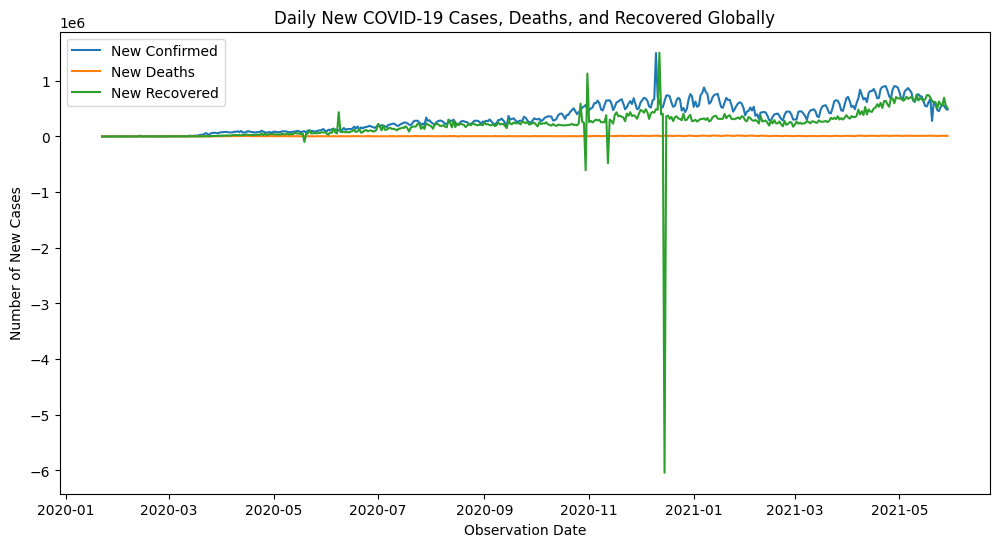

In [101]:
# Analyze daily new cases (requires sorting by date and then country/province)
df_covid_sorted = df_covid.sort_values(by=['Country/Region', 'Province/State', 'ObservationDate'])
df_covid_sorted['Confirmed_diff'] = df_covid_sorted.groupby(['Country/Region', 'Province/State'])['Confirmed'].diff().fillna(0)
df_covid_sorted['Deaths_diff'] = df_covid_sorted.groupby(['Country/Region', 'Province/State'])['Deaths'].diff().fillna(0)
df_covid_sorted['Recovered_diff'] = df_covid_sorted.groupby(['Country/Region', 'Province/State'])['Recovered'].diff().fillna(0)

# Group by date to see daily new cases globally
df_daily_new = df_covid_sorted.groupby('ObservationDate')[['Confirmed_diff', 'Deaths_diff', 'Recovered_diff']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily_new, x='ObservationDate', y='Confirmed_diff', label='New Confirmed')
sns.lineplot(data=df_daily_new, x='ObservationDate', y='Deaths_diff', label='New Deaths')
sns.lineplot(data=df_daily_new, x='ObservationDate', y='Recovered_diff', label='New Recovered')
plt.title('Daily New COVID-19 Cases, Deaths, and Recovered Globally')
plt.xlabel('Observation Date')
plt.ylabel('Number of New Cases')
plt.legend()
plt.show()


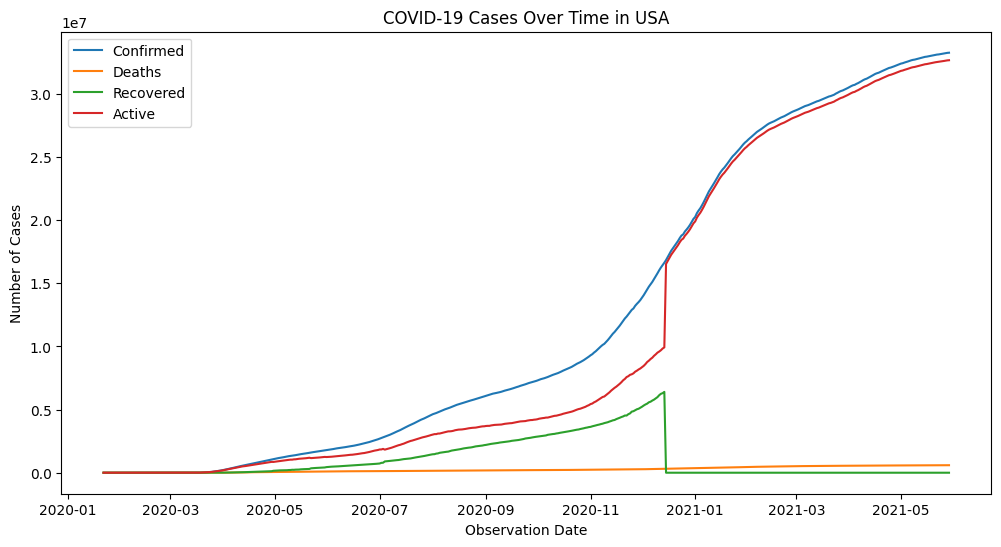

In [102]:
# Country specific analysis (example for USA)
df_usa = df_covid_sorted[df_covid_sorted['Country/Region'] == 'US']
df_usa_time = df_usa.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
df_usa_daily_new = df_usa.groupby('ObservationDate')[['Confirmed_diff', 'Deaths_diff', 'Recovered_diff']].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_usa_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_usa_time, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=df_usa_time, x='ObservationDate', y='Recovered', label='Recovered')
sns.lineplot(data=df_usa_time, x='ObservationDate', y='Active', label='Active')
plt.title('COVID-19 Cases Over Time in USA')
plt.xlabel('Observation Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

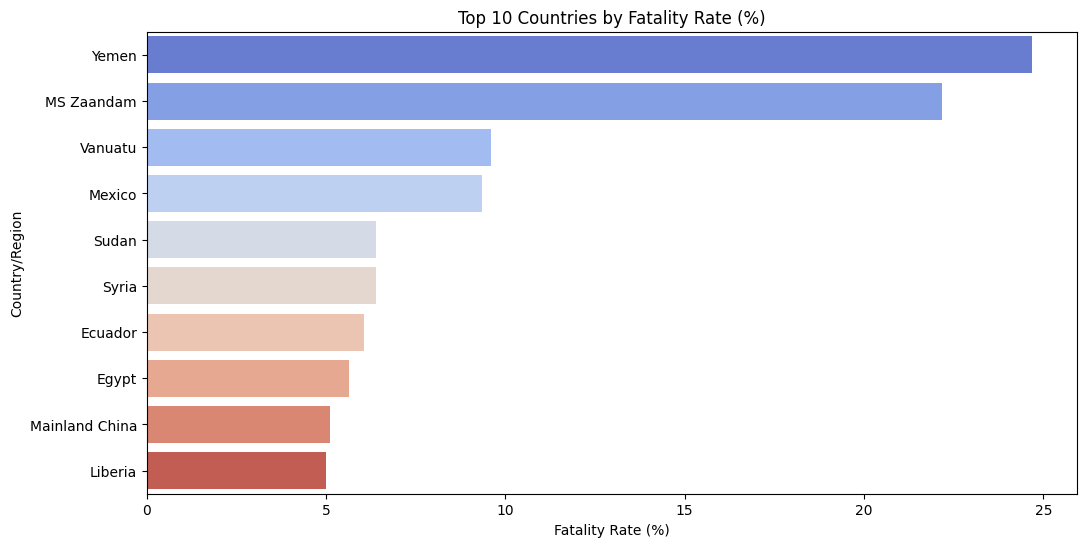

In [103]:
# Calculate Fatality Rate
df_latest['Fatality_Rate'] = (df_latest['Deaths'] / df_latest['Confirmed']) * 100
df_latest['Fatality_Rate'] = df_latest['Fatality_Rate'].fillna(0) # Handle division by zero for countries with 0 confirmed

# Sort by fatality rate and visualize top 10 countries
df_latest_top10_fatality = df_latest.sort_values(by='Fatality_Rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Fatality_Rate', y='Country/Region', data=df_latest_top10_fatality, hue='Country/Region', palette='coolwarm', legend=False)
plt.title('Top 10 Countries by Fatality Rate (%)')
plt.xlabel('Fatality Rate (%)')
plt.ylabel('Country/Region')
plt.show()


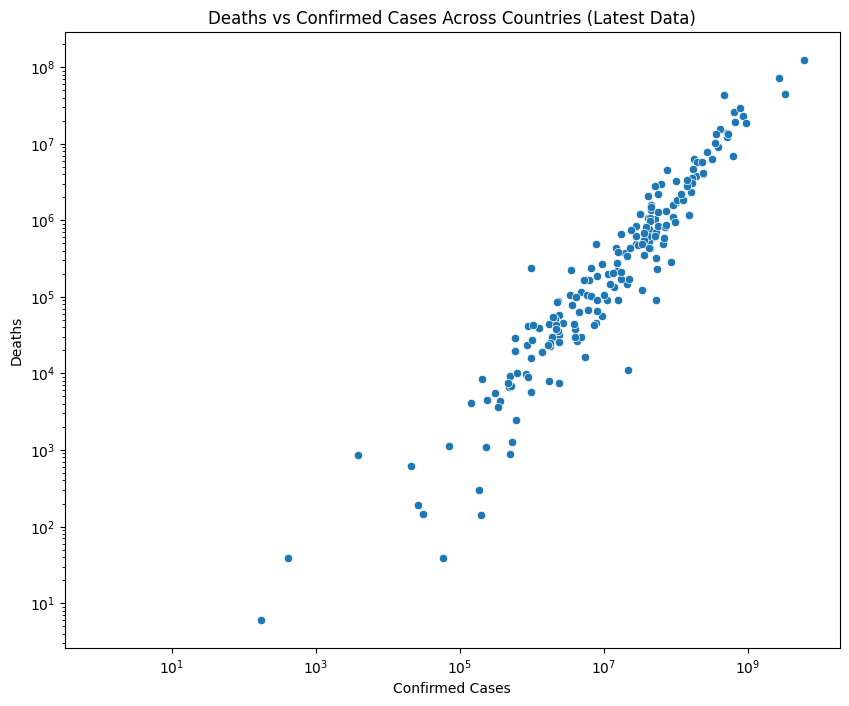

In [104]:
# Scatter plot of Deaths vs Confirmed cases
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Confirmed', y='Deaths', data=df_latest)
plt.title('Deaths vs Confirmed Cases Across Countries (Latest Data)')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.xscale('log') # Use log scale due to wide range of values
plt.yscale('log')
plt.show()

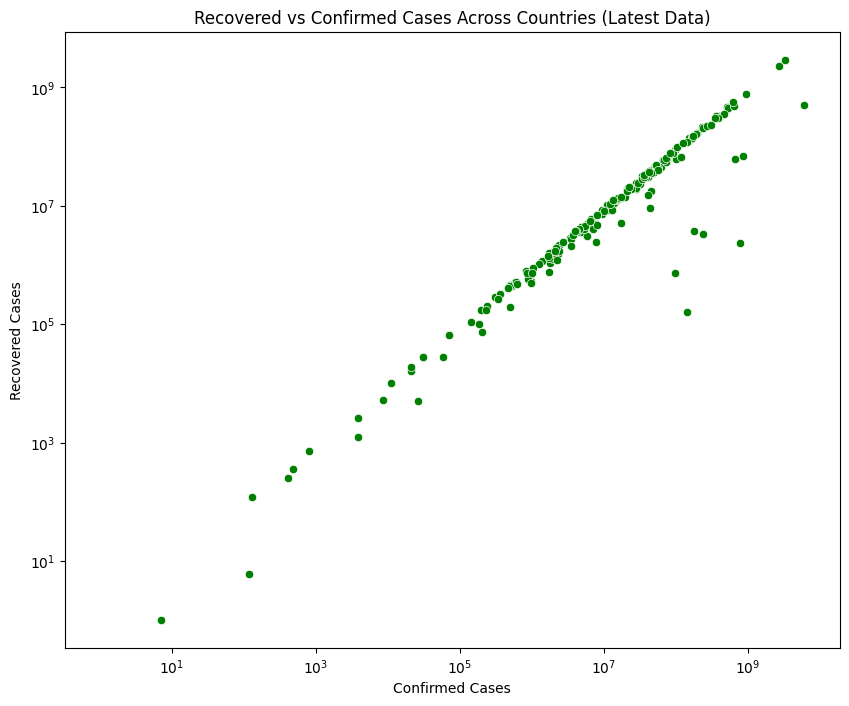

In [105]:
# Scatter plot of Recovered vs Confirmed cases
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Confirmed', y='Recovered', data=df_latest, color='green')
plt.title('Recovered vs Confirmed Cases Across Countries (Latest Data)')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered Cases')
plt.xscale('log')
plt.yscale('log')
plt.show()

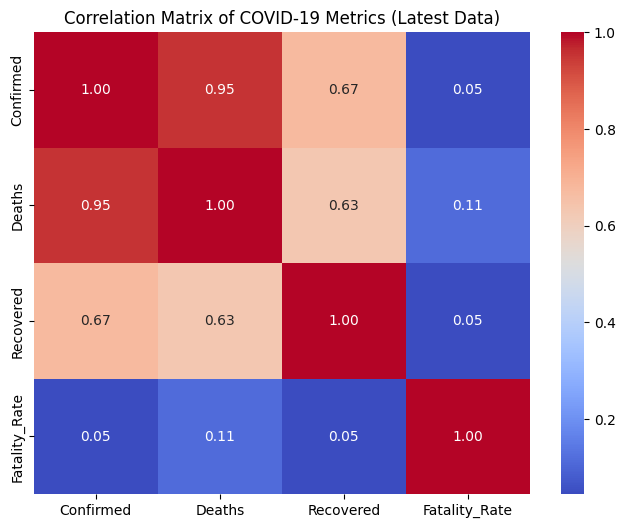

In [111]:
# Heatmap of the correlation matrix for numerical columns in the latest data
plt.figure(figsize=(8, 6))
sns.heatmap(df_latest[['Confirmed', 'Deaths', 'Recovered', 'Fatality_Rate']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of COVID-19 Metrics (Latest Data)')
plt.show()

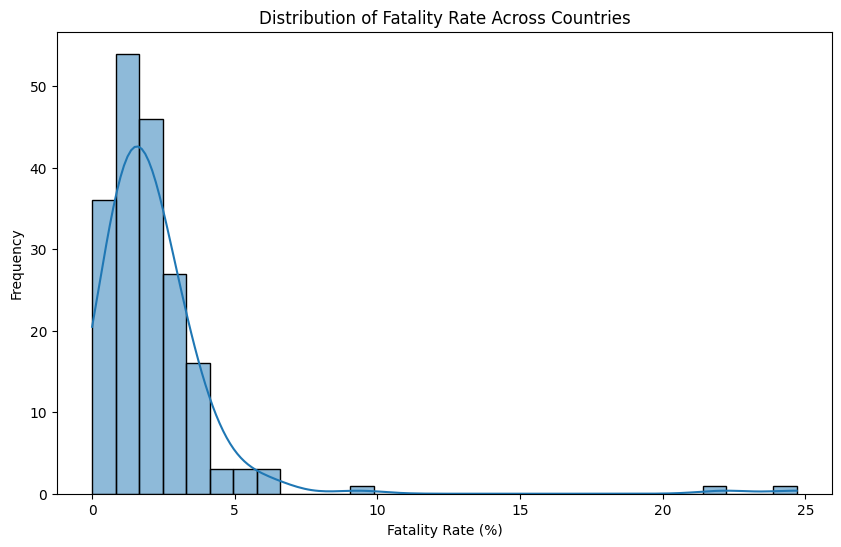

In [112]:
# Distribution of Fatality Rate (consider countries with more than a certain number of cases)
df_latest_filtered = df_latest[df_latest['Confirmed'] > 1000] # Filter out countries with very few cases

plt.figure(figsize=(10, 6))
sns.histplot(df_latest_filtered['Fatality_Rate'], bins=30, kde=True)
plt.title('Distribution of Fatality Rate Across Countries')
plt.xlabel('Fatality Rate (%)')
plt.ylabel('Frequency')
plt.show()

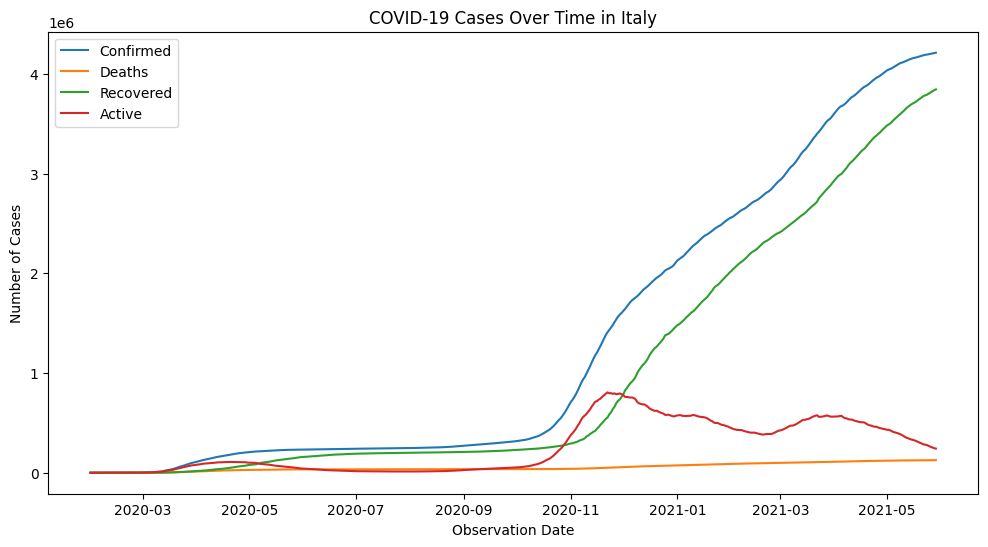

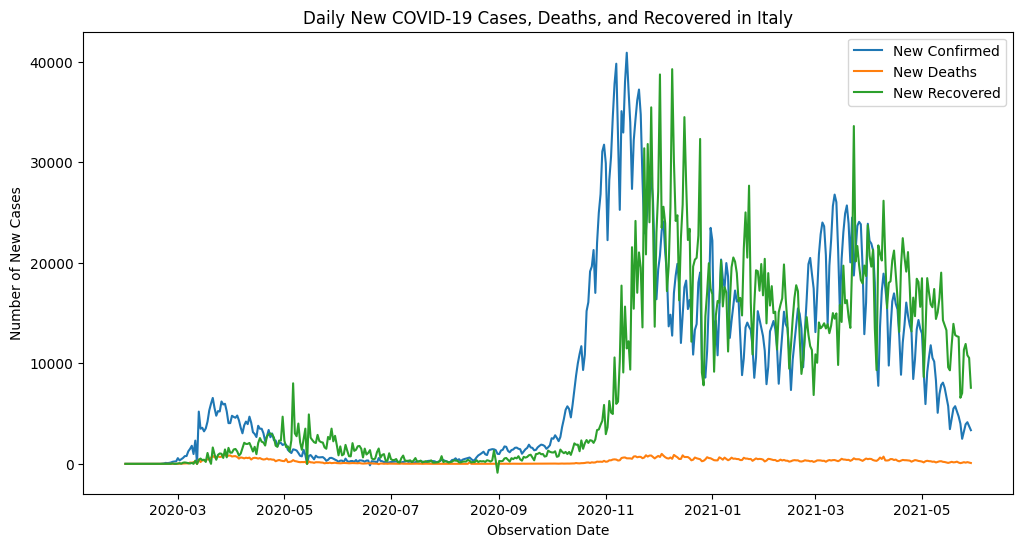

In [114]:
# Time series analysis for a specific country (e.g., Italy)
df_italy = df_covid_sorted[df_covid_sorted['Country/Region'] == 'Italy']
df_italy_time = df_italy.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_italy_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_italy_time, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=df_italy_time, x='ObservationDate', y='Recovered', label='Recovered')
sns.lineplot(data=df_italy_time, x='ObservationDate', y='Active', label='Active')
plt.title('COVID-19 Cases Over Time in Italy')
plt.xlabel('Observation Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# Daily new cases for Italy
df_italy_daily_new = df_italy.groupby('ObservationDate')[['Confirmed_diff', 'Deaths_diff', 'Recovered_diff']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_italy_daily_new, x='ObservationDate', y='Confirmed_diff', label='New Confirmed')
sns.lineplot(data=df_italy_daily_new, x='ObservationDate', y='Deaths_diff', label='New Deaths')
sns.lineplot(data=df_italy_daily_new, x='ObservationDate', y='Recovered_diff', label='New Recovered')
plt.title('Daily New COVID-19 Cases, Deaths, and Recovered in Italy')
plt.xlabel('Observation Date')
plt.ylabel('Number of New Cases')
plt.legend()
plt.show()